In [108]:
# imports

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc
)


pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [110]:
dataRaw = pd.read_csv(r'F:\Python Projects\da231-project\accepted_2007_to_2018Q4\accepted_2007_to_2018Q4.csv', nrows=100000)
dataRaw.head()

C:\Users\Archit Agarwal\AppData\Local\Temp\ipykernel_9948\2433118832.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  dataRaw = pd.read_csv(r'F:\Python Projects\da231-project\accepted_2007_to_2018Q4\accepted_2007_to_2018Q4.csv', nrows=100000)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.00,20000.00,20000.00,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.00,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.00,35000.00,35000.00,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.00,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.00,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
dataRaw = dataRaw.dropna(axis=1, how='all')
dataRaw.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,99998.00,100000.00,100000.00,100000.00,100000.00,51806.00,17804.00,100000.00,100000.00,100000.00,99963.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,...,99999.00,100000.00,100000.00,94808.00,100000.00,100000.00,100000.00,100000.00,98942.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,781.00,781.00,781.00,781.00,621.00,781.00,781.00,2949.00,2949.00,2949.00
mean,65326126.10,15055.86,15055.86,15047.11,12.20,434.55,78371.35,19.25,0.35,694.59,698.59,0.59,34.06,65.42,11.95,0.24,17673.16,52.50,25.26,1001.82,1001.23,15155.90,15147.33,12136.02,2797.62,...,14.64,5.71,11.89,0.00,0.00,0.09,2.19,93.86,46.03,0.13,0.07,176851.44,52977.08,22509.91,44712.52,3.00,128.11,3.00,14.26,377.66,10246.05,187.47,4935.60,47.17,13.61
std,2437069.38,8641.84,8641.84,8636.87,4.14,246.20,89296.12,9.63,0.92,30.83,30.83,0.88,21.98,23.62,5.68,0.71,23709.06,24.13,12.11,2939.96,2938.13,9721.77,9716.14,8319.89,2775.06,...,8.28,3.33,5.67,0.03,0.07,0.52,1.88,8.98,36.42,0.39,0.52,178718.81,49356.96,22337.60,45135.17,0.00,103.20,0.00,9.72,305.27,6362.47,179.41,3494.12,5.71,7.42
min,56705.00,1000.00,1000.00,900.00,5.32,14.77,0.00,0.00,0.00,660.00,664.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.00,0.00,1.00,0.00,0.00,0.00,0.00,11.10,0.00,0.00,0.00,2500.00,0.00,0.00,0.00,3.00,0.64,3.00,0.00,1.92,55.73,0.02,186.00,20.00,0.00
25%,63867535.25,8000.00,8000.00,8000.00,9.17,256.55,47600.00,12.57,0.00,670.00,674.00,0.00,15.00,51.00,8.00,0.00,6276.75,34.40,16.00,0.00,0.00,7597.95,7592.83,5950.00,928.42,...,9.00,3.00,8.00,0.00,0.00,0.00,1.00,90.90,12.50,0.00,0.00,52220.00,22765.00,8000.00,16109.25,3.00,47.71,3.00,7.00,141.72,5044.21,46.50,2111.63,45.00,8.00
50%,65644568.00,13875.00,13875.00,13825.00,11.99,378.07,65000.00,18.70,0.00,685.00,689.00,0.00,31.00,67.00,11.00,0.00,11813.50,52.40,24.00,0.00,0.00,13011.01,13006.03,10000.00,1837.77,...,13.00,5.00,11.00,0.00,0.00,0.00,2.00,97.40,50.00,0.00,0.00,115018.50,40236.50,15600.00,34070.50,3.00,102.11,3.00,15.00,301.53,9195.99,138.31,4251.72,45.00,14.00
75%,66542848.00,20000.00,20000.00,20000.00,14.48,572.85,94000.00,25.53,0.00,710.00,714.00,1.00,50.00,81.00,15.00,0.00,21349.00,70.90,32.00,0.00,0.00,20929.67,20922.94,16500.00,3736.69,...,19.00,7.00,15.00,0.00,0.00,0.00,3.00,100.00,75.00,0.00,0.00,254713.25,66925.00,29500.00,59835.75,3.00,175.79,3.00,23.00,519.78,14667.45,273.84,6898.96,50.00,18.00
max,68617057.00,35000.00,35000.00,35000.00,28.99,1354.66,9000000.00,999.00,30.00,845.00,850.00,5.00,157.00,120.00,67.00,86.00,898146.00,152.50,135.00,22692.22,22692.22,57291.00,57291.00,35000.00,24125.83,...,118.00,43.00,67.00,2.00,4.00,30.00,30.00,100.00,100.00,8.00,85.00,9999999.00,1684313.00,317000.00,2101913.00,3.00,638.13,3.00,30.00,1914.39,29401.04,926.41,23105.58,97.66,65.00


In [112]:
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 137 entries, id to settlement_term
dtypes: float64(100), int64(1), object(36)
memory usage: 104.5+ MB


In [113]:
dataRaw['loan_status'].value_counts().hvplot.bar(
    title="Loan Status", xlabel='Status', ylabel='Count', 
    width=900, height=350
)

:Bars   [index]   (loan_status)

In [114]:
#plt.figure(figsize=(12, 8))
#sns.heatmap(dataRaw.corr(numeric_only=True), annot=True, cmap='viridis')

In [115]:
loan_amnt = dataRaw.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment = dataRaw.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [116]:
installment_box = dataRaw.hvplot.box(
    y='installment', subplots=True, by='loan_status', width=350, height=350, 
    title="Loan Status by Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box = dataRaw.hvplot.box(
    y='loan_amnt', subplots=True, by='loan_status', width=350, height=350, 
    title="Loan Status by Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)

loan_amnt_box + installment_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

In [117]:
dataRaw.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,17603.00,15618.18,8589.58,1000.00,9212.50,14700.00,20650.00,35000.00
Current,11402.00,20039.01,7243.57,1200.00,14400.00,19200.00,25000.00,35000.00
Default,1.00,35000.00,NaN,35000.00,35000.00,35000.00,35000.00,35000.00
Fully Paid,70288.00,14065.02,8569.15,1000.00,7225.00,12000.00,20000.00,35000.00
In Grace Period,199.00,20337.56,7413.35,6000.00,14000.00,19950.00,25275.00,35000.00
Late (16-30 days),66.00,18833.71,6779.86,10000.00,13143.75,17812.50,21150.00,35000.00
Late (31-120 days),441.00,18700.96,7635.07,2000.00,12000.00,17000.00,24000.00,35000.00


In [118]:
print(f"GRADE unique: {dataRaw.grade.unique()} \n count {len(dataRaw.grade.unique())}")
print(f"SUB_GRADE unique: {dataRaw.sub_grade.unique()} \n count {len(dataRaw.sub_grade.unique())}")
print(f"status unique: {dataRaw.loan_status.unique()} \n count {len(dataRaw.loan_status.unique())}")

GRADE unique: ['C' 'B' 'F' 'A' 'E' 'D' 'G'] 
 count 7
SUB_GRADE unique: ['C4' 'C1' 'B4' 'C5' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3'
 'A1' 'D4' 'F3' 'D1' 'B3' 'E4' 'D3' 'D2' 'D5' 'A5' 'F2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5'] 
 count 35
status unique: ['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default'] 
 count 7


In [119]:
fully_paid = dataRaw.loc[dataRaw['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() 
charged_off = dataRaw.loc[dataRaw['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Grade.I  :Bars   [index]   (grade)
   .Bars.Grade.II :Bars   [index]   (grade)

In [120]:
charged_off = dataRaw.loc[dataRaw['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar() 
fully_paid = dataRaw.loc[dataRaw['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar() 


(fully_paid * charged_off).opts(
    title="Loan Status by sub grade", xlabel='Grades', ylabel='Count',
    width=500, height=400, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Sub_grade.I  :Bars   [index]   (sub_grade)
   .Bars.Sub_grade.II :Bars   [index]   (sub_grade)

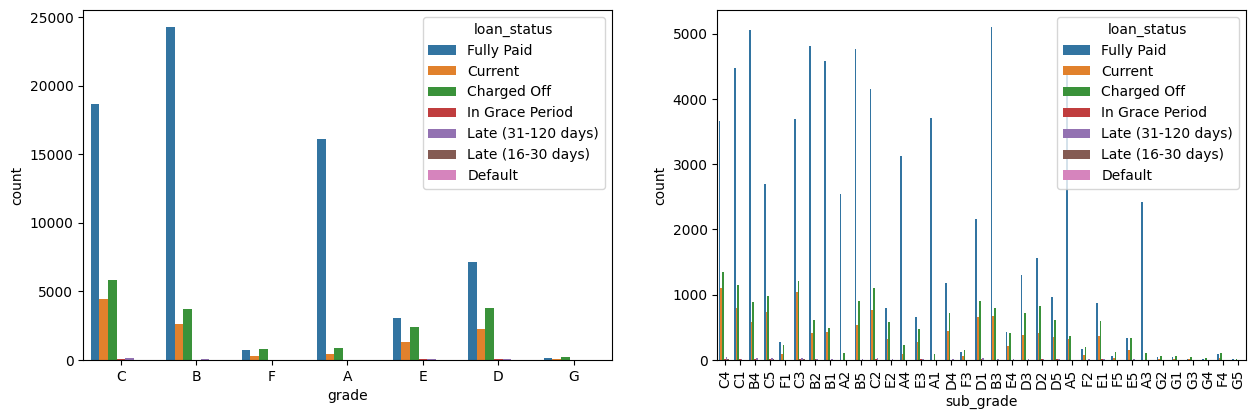

In [121]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = dataRaw.grade.unique().tolist()
sns.countplot(x='grade', data=dataRaw, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = dataRaw.sub_grade.unique().tolist()
g = sns.countplot(x='sub_grade', data=dataRaw, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [122]:
# dataRaw.grade.unique().tolist()

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

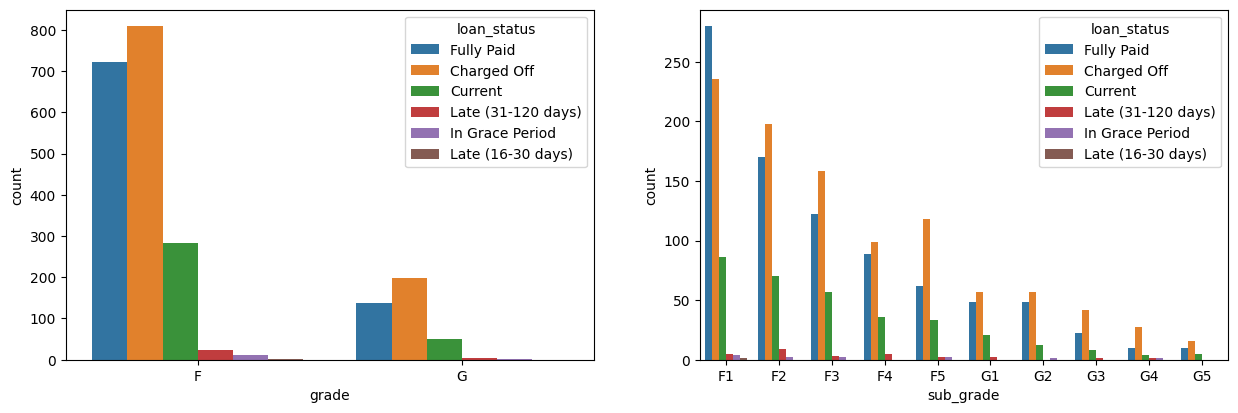

In [123]:
df = dataRaw[(dataRaw.grade == 'F') | (dataRaw.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

In [124]:
dataRaw['home_ownership'].value_counts()

MORTGAGE    49477
RENT        39257
OWN         11265
ANY             1
Name: home_ownership, dtype: int64

In [125]:
fully_paid = dataRaw.loc[dataRaw['loan_status']=='Fully Paid', 'home_ownership'].value_counts().hvplot.bar() 
charged_off = dataRaw.loc[dataRaw['loan_status']=='Charged Off', 'home_ownership'].value_counts().hvplot.bar()

home_ownership_count = (fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=90)

home_ownership = dataRaw.home_ownership.value_counts().hvplot.bar(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count', 
    width=350, height=350, legend='top'
).opts(xrotation=90)

(home_ownership_count + home_ownership)

:Layout
   .Overlay.Home_ownership :Overlay
      .Bars.Home_ownership.I  :Bars   [index]   (home_ownership)
      .Bars.Home_ownership.II :Bars   [index]   (home_ownership)
   .Bars.Home_ownership    :Bars   [index]   (home_ownership)

In [126]:
dataRaw.loc[(dataRaw.home_ownership == 'ANY') | (dataRaw.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
dataRaw.home_ownership.value_counts()

MORTGAGE    49477
RENT        39257
OWN         11265
OTHER           1
Name: home_ownership, dtype: int64

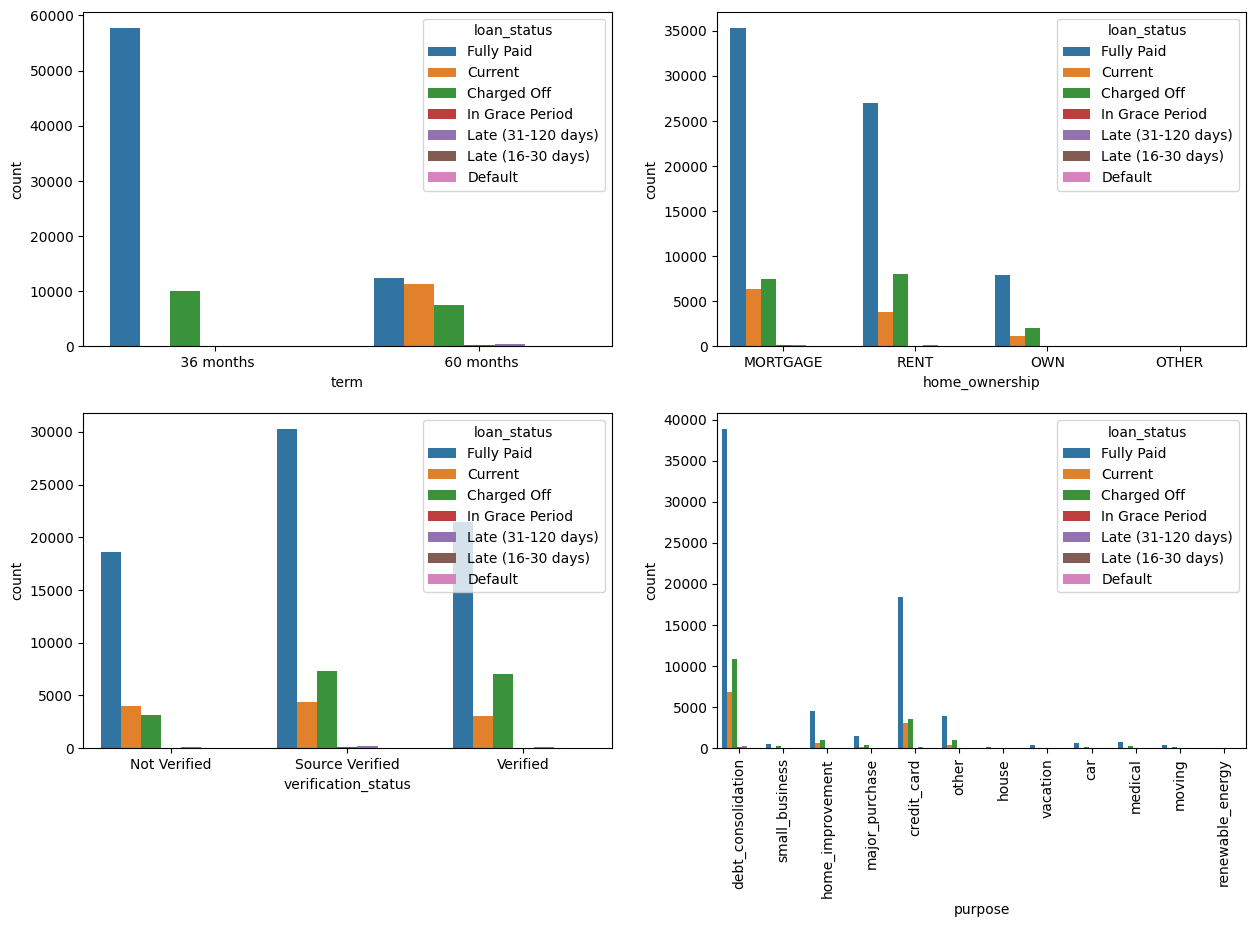

In [127]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=dataRaw, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=dataRaw, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=dataRaw, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=dataRaw, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [128]:
dataRaw['loan_status'] = dataRaw.loan_status.map({'Fully Paid':1, 'Charged Off':0})
dataRaw.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=600, height=400, 
    title="Correlation between Loan status and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features', 
)

C:\Users\Archit Agarwal\AppData\Local\Temp\ipykernel_9948\2160152372.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataRaw.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(


:Bars   [index]   (loan_status)

In [129]:
# Data Preprocessing

In [130]:
# Missing values
for column in dataRaw.columns:
    if dataRaw[column].isna().sum() != 0:
        missing = dataRaw[column].isna().sum()
        portion = (missing / dataRaw.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '6133' ==> '6.133%'
'emp_length': number of missing values '6112' ==> '6.112%'
'loan_status': number of missing values '12109' ==> '12.109%'
'desc': number of missing values '99993' ==> '99.993%'
'title': number of missing values '132' ==> '0.132%'
'dti': number of missing values '2' ==> '0.002%'
'mths_since_last_delinq': number of missing values '48194' ==> '48.194%'
'mths_since_last_record': number of missing values '82196' ==> '82.196%'
'revol_util': number of missing values '37' ==> '0.037%'
'last_pymnt_d': number of missing values '71' ==> '0.071%'
'next_pymnt_d': number of missing values '87891' ==> '87.891%'
'last_credit_pull_d': number of missing values '3' ==> '0.003%'
'mths_since_last_major_derog': number of missing values '70629' ==> '70.629%'
'annual_inc_joint': number of missing values '99498' ==> '99.498%'
'dti_joint': number of missing values '99500' ==> '99.500%'
'verification_status_joint': number of missing values '99498' ==> '99.

In [131]:
print(dataRaw.emp_title.nunique())
dataRaw.drop('emp_title', axis=1, inplace=True)

37529


In [132]:
dataRaw.emp_length.unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

In [133]:
for year in dataRaw.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{dataRaw[dataRaw.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')
dataRaw.drop('emp_length', axis=1, inplace=True)

10+ years years in this position:
1.00   0.81
0.00   0.19
Name: loan_status, dtype: float64
3 years years in this position:
1.00   0.80
0.00   0.20
Name: loan_status, dtype: float64
4 years years in this position:
1.00   0.80
0.00   0.20
Name: loan_status, dtype: float64
6 years years in this position:
1.00   0.81
0.00   0.19
Name: loan_status, dtype: float64
1 year years in this position:
1.00   0.79
0.00   0.21
Name: loan_status, dtype: float64
7 years years in this position:
1.00   0.81
0.00   0.19
Name: loan_status, dtype: float64
8 years years in this position:
1.00   0.80
0.00   0.20
Name: loan_status, dtype: float64
5 years years in this position:
1.00   0.79
0.00   0.21
Name: loan_status, dtype: float64
2 years years in this position:
1.00   0.80
0.00   0.20
Name: loan_status, dtype: float64
9 years years in this position:
1.00   0.79
0.00   0.21
Name: loan_status, dtype: float64
< 1 year years in this position:
1.00   0.79
0.00   0.21
Name: loan_status, dtype: float64
nan year

In [134]:
print(dataRaw.title.value_counts().head())
print(dataRaw.purpose.value_counts().head())

Debt consolidation         56863
Credit card refinancing    25276
Home improvement            6264
Other                       5251
Major purchase              1947
Name: title, dtype: int64
debt_consolidation    56914
credit_card           25312
home_improvement       6283
other                  5261
major_purchase         1951
Name: purpose, dtype: int64


In [135]:
dataRaw.drop('title', axis=1, inplace=True)

In [136]:
dataRaw.mort_acc.value_counts()

0.00     39632
1.00     17511
2.00     15292
3.00     11094
4.00      7466
5.00      4384
6.00      2325
7.00      1139
8.00       571
9.00       280
10.00      121
11.00       70
12.00       38
13.00       23
14.00       18
15.00        9
16.00        9
17.00        5
18.00        4
21.00        3
22.00        2
23.00        2
25.00        1
35.00        1
Name: mort_acc, dtype: int64

In [137]:
dataRaw.mort_acc.isna().sum()

0

In [138]:
dataRaw.corr(numeric_only=True)['mort_acc'].drop('mort_acc').sort_values().hvplot.barh()

:Bars   [index]   (mort_acc)

In [139]:
total_acc_avg = dataRaw.groupby(by='total_acc').mean().mort_acc

C:\Users\Archit Agarwal\AppData\Local\Temp\ipykernel_9948\1405209635.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = dataRaw.groupby(by='total_acc').mean().mort_acc


In [140]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [141]:
# dataRaw.dropna(inplace=True)
dataRaw.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,...,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,3600.00,3600.00,3600.00,36 months,13.99,123.03,C,C4,MORTGAGE,55000.00,Not Verified,Dec-2015,1.00,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,190xx,PA,5.91,0.00,Aug-2003,675.00,679.00,...,2400.00,13734.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,24700.00,24700.00,24700.00,36 months,11.99,820.28,C,C1,MORTGAGE,65000.00,Not Verified,Dec-2015,1.00,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,577xx,SD,16.06,1.00,Dec-1999,715.00,719.00,...,79300.00,24667.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,20000.00,20000.00,20000.00,60 months,10.78,432.66,B,B4,MORTGAGE,63000.00,Not Verified,Dec-2015,1.00,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,605xx,IL,10.78,0.00,Aug-2000,695.00,699.00,...,6200.00,14877.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,35000.00,35000.00,35000.00,60 months,14.85,829.90,C,C5,MORTGAGE,110000.00,Source Verified,Dec-2015,NaN,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,076xx,NJ,17.06,0.00,Sep-2008,785.00,789.00,...,62500.00,18000.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,10400.00,10400.00,10400.00,60 months,22.45,289.91,F,F1,MORTGAGE,104433.00,Source Verified,Dec-2015,1.00,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,174xx,PA,25.37,1.00,Jun-1998,695.00,699.00,...,20300.00,88097.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# dataRaw['mort_acc'] = dataRaw.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [143]:
for column in dataRaw.columns:
    if dataRaw[column].isna().sum() != 0:
        missing = dataRaw[column].isna().sum()
        portion = (missing / dataRaw.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'loan_status': number of missing values '12109' ==> '12.109%'
'desc': number of missing values '99993' ==> '99.993%'
'dti': number of missing values '2' ==> '0.002%'
'mths_since_last_delinq': number of missing values '48194' ==> '48.194%'
'mths_since_last_record': number of missing values '82196' ==> '82.196%'
'revol_util': number of missing values '37' ==> '0.037%'
'last_pymnt_d': number of missing values '71' ==> '0.071%'
'next_pymnt_d': number of missing values '87891' ==> '87.891%'
'last_credit_pull_d': number of missing values '3' ==> '0.003%'
'mths_since_last_major_derog': number of missing values '70629' ==> '70.629%'
'annual_inc_joint': number of missing values '99498' ==> '99.498%'
'dti_joint': number of missing values '99500' ==> '99.500%'
'verification_status_joint': number of missing values '99498' ==> '99.498%'
'open_acc_6m': number of missing values '78628' ==> '78.628%'
'open_act_il': number of missing values '78628' ==> '78.628%'
'open_il_12m': number of missing values 

In [144]:
dataRaw.shape

(100000, 134)

In [145]:
# Category data replace to numeric

In [146]:
print([column for column in dataRaw.columns if dataRaw[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date']


In [147]:
dataRaw.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [148]:
term_values = {' 36 months': 36, ' 60 months': 60}
dataRaw['term'] = dataRaw.term.map(term_values)

In [149]:
dataRaw.term.unique()

array([36, 60], dtype=int64)

In [150]:
dataRaw.drop('grade', axis=1, inplace=True)

In [151]:
dataRaw.drop('issue_d', axis=1, inplace=True)

In [152]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership','pymnt_plan','addr_state', 'earliest_cr_line',  'hardship_flag', 'hardship_type', 'hardship_status',  'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'settlement_status']
dataRaw = pd.get_dummies(dataRaw, columns=dummies, drop_first=True)

In [153]:
print([column for column in dataRaw.columns if dataRaw[column].dtype == object])

['url', 'desc', 'zip_code', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'verification_status_joint', 'hardship_reason', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']


In [154]:
dataRaw.drop(['zip_code','url', 'desc', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'verification_status_joint', 'hardship_reason', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date'], axis=1, inplace=True)

In [155]:
dataRaw.shape

(100000, 832)

In [156]:
w_p = dataRaw.loan_status.value_counts()[0] / dataRaw.shape[0]
w_n = dataRaw.loan_status.value_counts()[1] / dataRaw.shape[0]

print(f"Weight: positive values {w_p}")
print(f"Weight: negative values {w_n}")

Weight: positive values 0.17603
Weight: negative values 0.70288


In [157]:
train, test = train_test_split(dataRaw, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(67000, 832)
(33000, 832)


In [158]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(66981, 832)
(67000, 832)
(67000, 832)
(66015, 832)


In [159]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [160]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [162]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [163]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [164]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

NameError: name 'tf' is not defined

In [ ]:
plot_learning_evolution(r)

In [ ]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

In [ ]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

In [ ]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}